<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/GRAPH_COAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.모듈 불러오기**








In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly


from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /content/gdrive


# **2.data**


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/usethis.csv", encoding = 'utf-8-sig')
df = df.sort_values('ds')
df['ds']= pd.to_datetime(df['ds'])

df = df.set_index('ds')
df = df[df.index < '2019-04-01']
# df = df.reset_index()
df

,Coal,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,...,FTSE,DAX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E,ASX,TSX
ds,,,,,,,,,,,,,,,,,,,,,
2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,0.99960,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,0.99960,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,0.99270,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,0.99239,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,0.99700,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,1.33791,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,1.34117,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,1.34305,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


#산점도

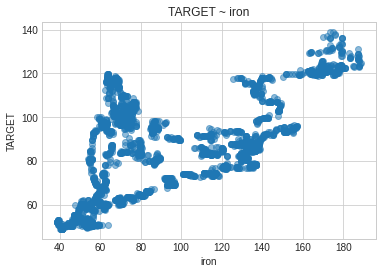

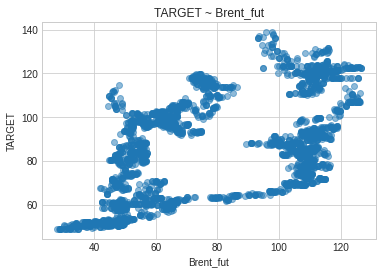

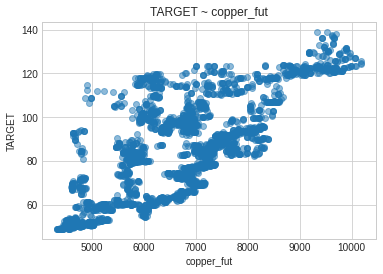

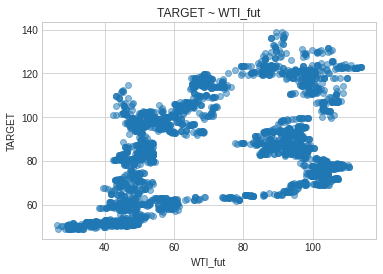

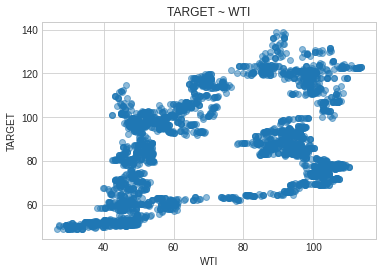

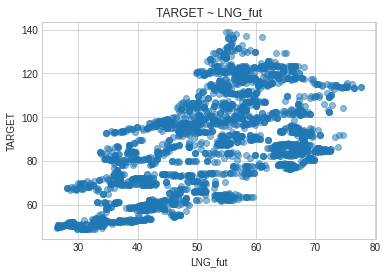

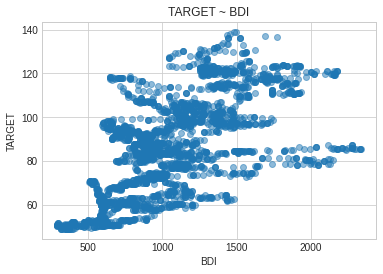

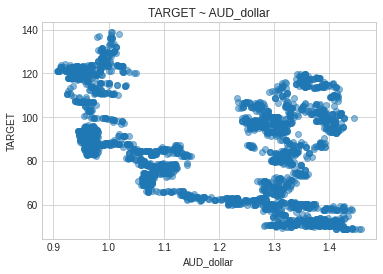

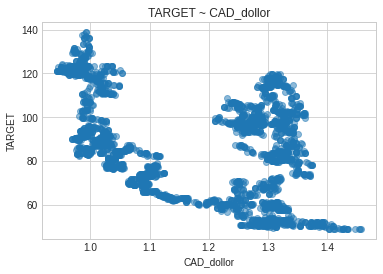

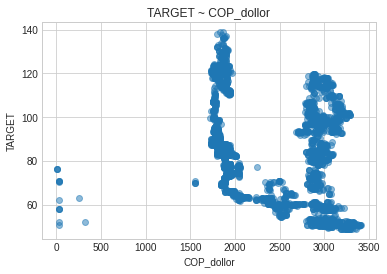

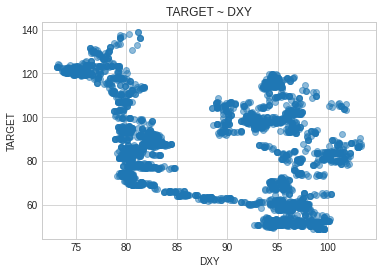

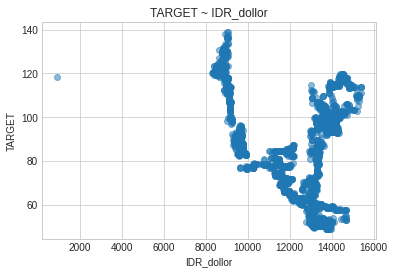

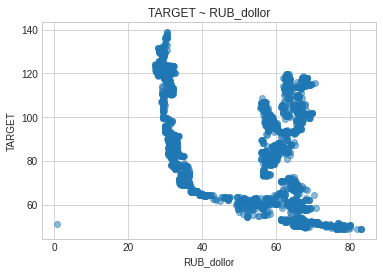

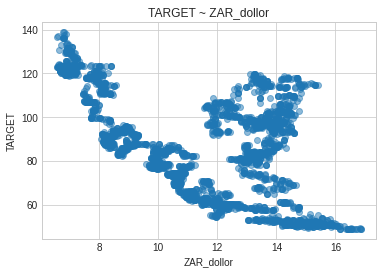

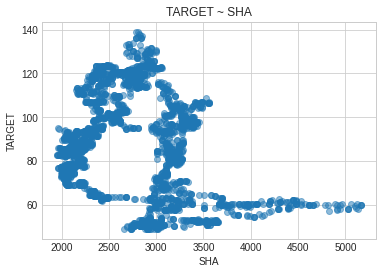

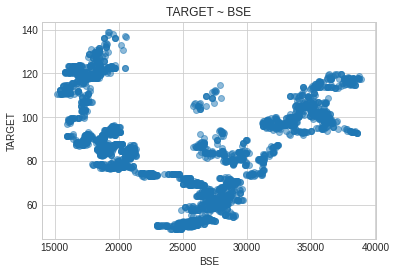

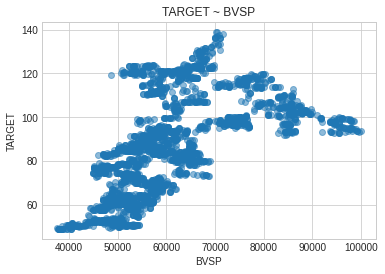

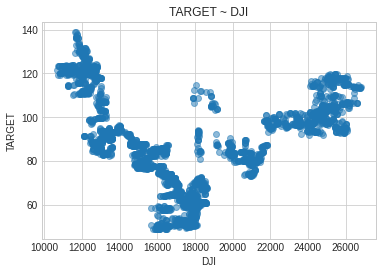

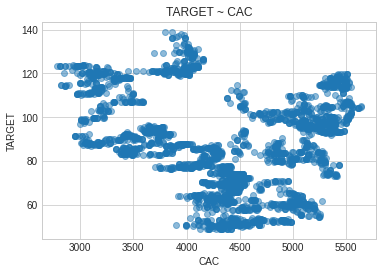

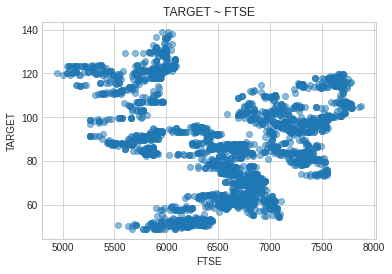

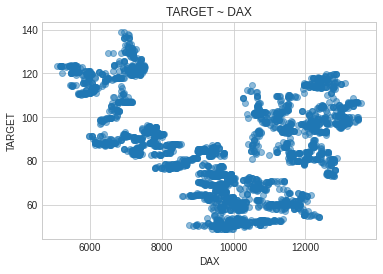

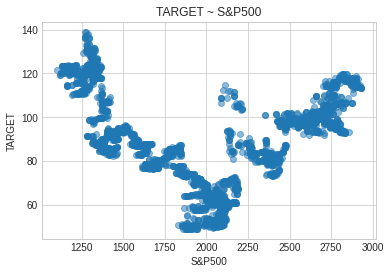

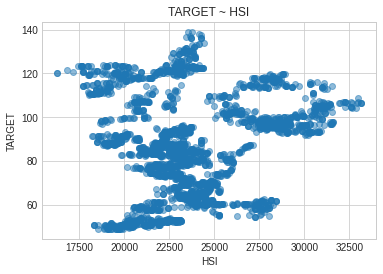

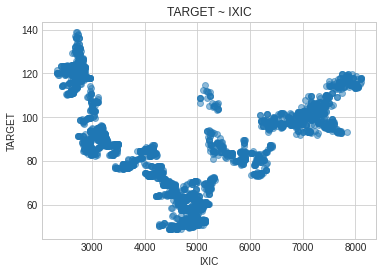

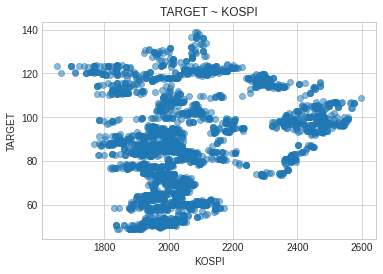

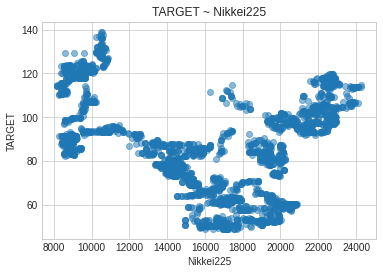

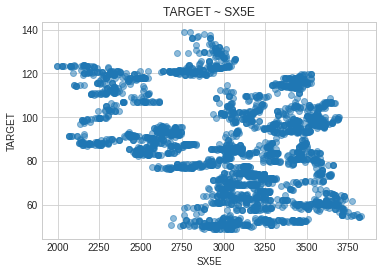

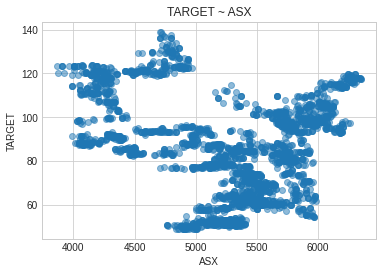

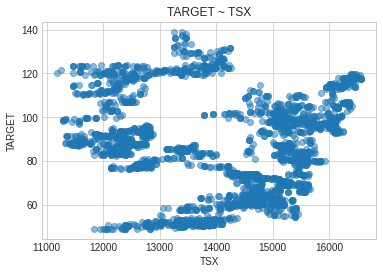

In [ ]:
for i in range(1,len(df.columns)):
    X = df.iloc[:,i].values
    Y = df.iloc[:,0].values


    plt.scatter(X, Y, alpha=0.5)
    plt.title(f'TARGET ~ {df.iloc[:,i].name}')
    plt.xlabel(f'{df.iloc[:,i].name}')
    plt.ylabel('TARGET')
    plt.show()

#공분산 및 상관계수

In [ ]:
for i in range(1,len(df.columns)):
 X = df.iloc[:,i].values
 Y = df.iloc[:,0].values


 p = np.corrcoef(X,Y)[0,1]
 print(f'{df.iloc[:,i].name} corrcoef is {p}')

iron corrcoef is 0.6222855901916815
Brent_fut corrcoef is 0.5045741890853804
copper_fut corrcoef is 0.7235394198123951
WTI_fut corrcoef is 0.44903765550885544
WTI corrcoef is 0.4496640500696631
LNG_fut corrcoef is 0.5897212025792706
BDI corrcoef is 0.602692771252653
AUD_dollar corrcoef is -0.4232454521760248
CAD_dollor corrcoef is -0.4083519117119885
COP_dollor corrcoef is -0.25995877668810635
DXY corrcoef is -0.451340297783814
IDR_dollor corrcoef is -0.4220283696368407
RUB_dollor corrcoef is -0.39982252847167093
ZAR_dollor corrcoef is -0.5209480157195969
SHA corrcoef is -0.23038497353490284
BSE corrcoef is -0.12228813412156363
BVSP corrcoef is 0.5814535444591438
DJI corrcoef is -0.05360393322145809
CAC corrcoef is -0.19739478997713863
FTSE corrcoef is -0.10417070475078617
DAX corrcoef is -0.2809257721011231
S&P500 corrcoef is -0.16784651056388564
HSI corrcoef is 0.14997404140287826
IXIC corrcoef is -0.08613431199275191
KOSPI corrcoef is 0.24513812714749247
Nikkei225 corrcoef is -0.281

In [ ]:
import scipy.stats as stats
for i in range(1,len(df.columns)):
 X = df.iloc[:,i].values
 Y = df.iloc[:,0].values


 
 print(f'{df.iloc[:,i].name}')
 print('Covarian: {:.2f}'.format(np.cov(X,Y)[0,1]))
 print('Correlation: {:.2f}'.format(stats.pearsonr(X,Y)[0]))
 print('P-value: {:.4f}'.format(stats.pearsonr(X,Y)[1]))
 print('--------------------done--------------------')

iron
Covarian: 550.73
Correlation: 0.62
P-value: 0.0000
--------------------done--------------------
Brent_fut
Covarian: 307.53
Correlation: 0.50
P-value: 0.0000
--------------------done--------------------
copper_fut
Covarian: 20449.23
Correlation: 0.72
P-value: 0.0000
--------------------done--------------------
WTI_fut
Covarian: 231.34
Correlation: 0.45
P-value: 0.0000
--------------------done--------------------
WTI
Covarian: 231.73
Correlation: 0.45
P-value: 0.0000
--------------------done--------------------
LNG_fut
Covarian: 151.42
Correlation: 0.59
P-value: 0.0000
--------------------done--------------------
BDI
Covarian: 5250.92
Correlation: 0.60
P-value: 0.0000
--------------------done--------------------
AUD_dollar
Covarian: -1.57
Correlation: -0.42
P-value: 0.0000
--------------------done--------------------
CAD_dollor
Covarian: -1.28
Correlation: -0.41
P-value: 0.0000
--------------------done--------------------
COP_dollor
Covarian: -3283.11
Correlation: -0.26
P-value: 0.0

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
X

array([13443.20019531, 13443.20019531, 13443.20019531, ...,
       16102.09960938, 16102.09960938, 16102.09960938])

In [ ]:
df.iloc[:,1].values

array([168.3, 168.3, 170. , ...,  85.7,  85.7,  85.7])

iron


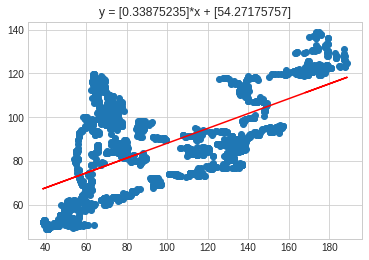

[0.33875235]
[54.27175757]
----------------------------------------------------------done-------------------------------------------------------------
Brent_fut


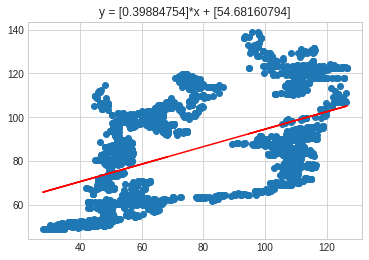

[0.39884754]
[54.68160794]
----------------------------------------------------------done-------------------------------------------------------------
copper_fut


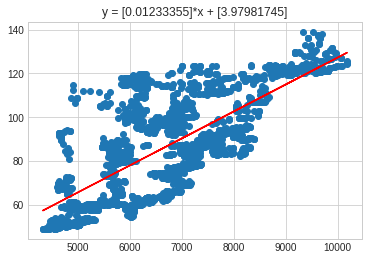

[0.01233355]
[3.97981745]
----------------------------------------------------------done-------------------------------------------------------------
WTI_fut


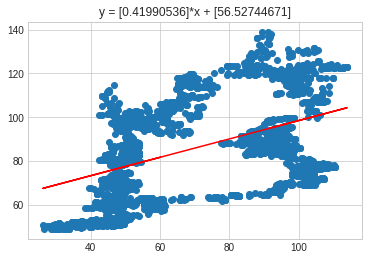

[0.41990536]
[56.52744671]
----------------------------------------------------------done-------------------------------------------------------------
WTI


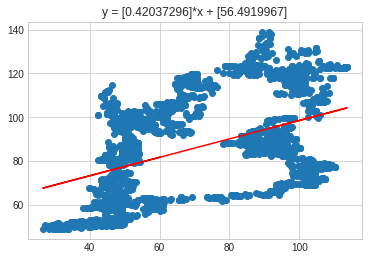

[0.42037296]
[56.4919967]
----------------------------------------------------------done-------------------------------------------------------------
LNG_fut


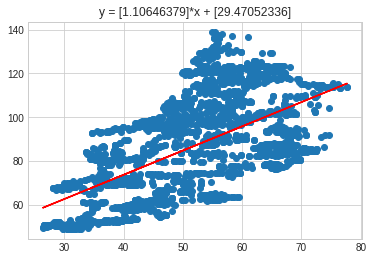

[1.10646379]
[29.47052336]
----------------------------------------------------------done-------------------------------------------------------------
BDI


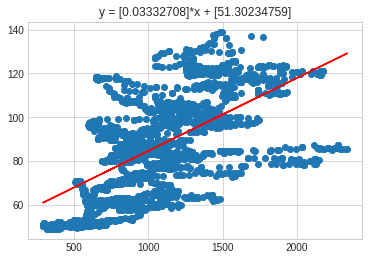

[0.03332708]
[51.30234759]
----------------------------------------------------------done-------------------------------------------------------------
AUD_dollar


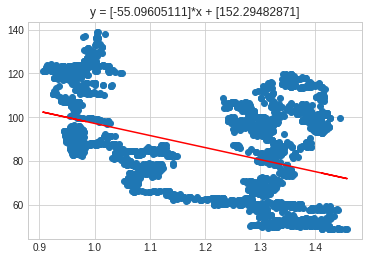

[-55.09605111]
[152.29482871]
----------------------------------------------------------done-------------------------------------------------------------
CAD_dollor


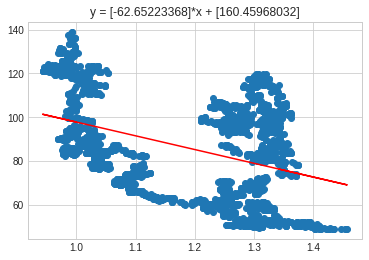

[-62.65223368]
[160.45968032]
----------------------------------------------------------done-------------------------------------------------------------
COP_dollor


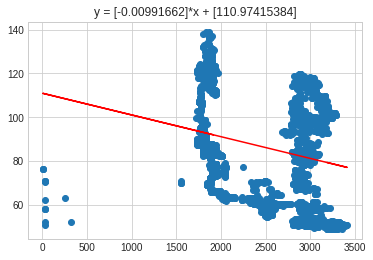

[-0.00991662]
[110.97415384]
----------------------------------------------------------done-------------------------------------------------------------
DXY


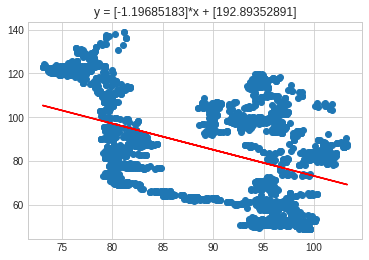

[-1.19685183]
[192.89352891]
----------------------------------------------------------done-------------------------------------------------------------
IDR_dollor


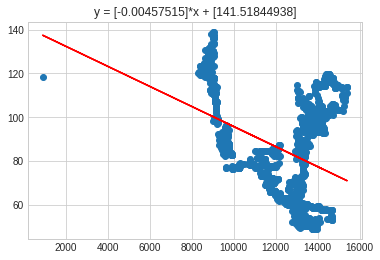

[-0.00457515]
[141.51844938]
----------------------------------------------------------done-------------------------------------------------------------
RUB_dollor


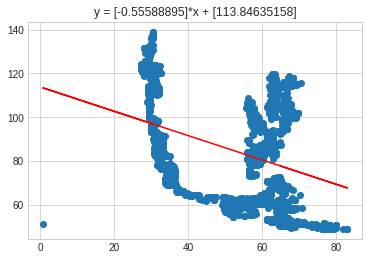

[-0.55588895]
[113.84635158]
----------------------------------------------------------done-------------------------------------------------------------
ZAR_dollor


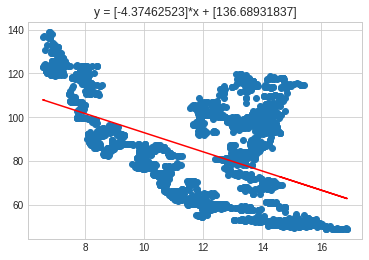

[-4.37462523]
[136.68931837]
----------------------------------------------------------done-------------------------------------------------------------
SHA


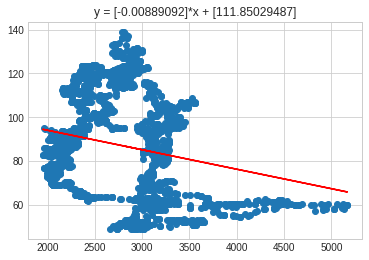

[-0.00889092]
[111.85029487]
----------------------------------------------------------done-------------------------------------------------------------
BSE


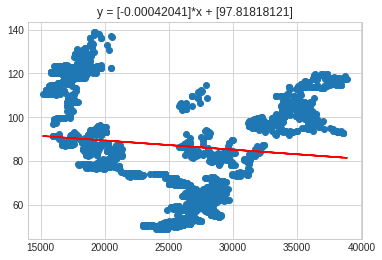

[-0.00042041]
[97.81818121]
----------------------------------------------------------done-------------------------------------------------------------
BVSP


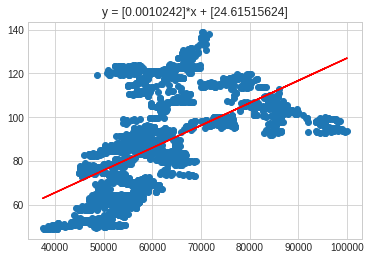

[0.0010242]
[24.61515624]
----------------------------------------------------------done-------------------------------------------------------------
DJI


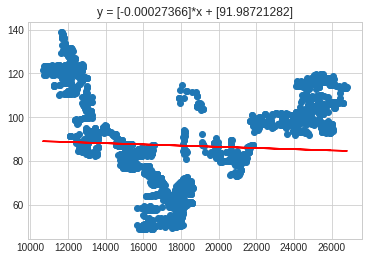

[-0.00027366]
[91.98721282]
----------------------------------------------------------done-------------------------------------------------------------
CAC


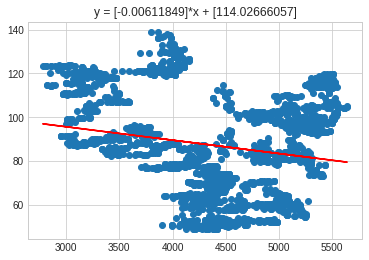

[-0.00611849]
[114.02666057]
----------------------------------------------------------done-------------------------------------------------------------
FTSE


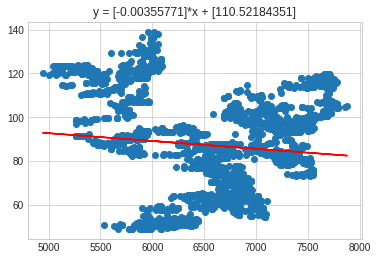

[-0.00355771]
[110.52184351]
----------------------------------------------------------done-------------------------------------------------------------
DAX


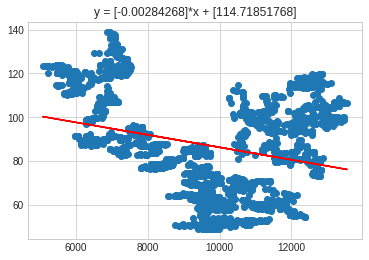

[-0.00284268]
[114.71851768]
----------------------------------------------------------done-------------------------------------------------------------
S&P500


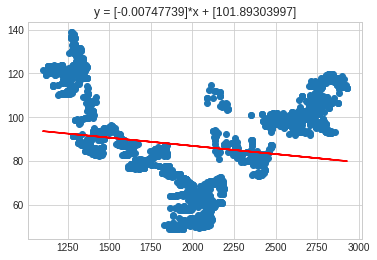

[-0.00747739]
[101.89303997]
----------------------------------------------------------done-------------------------------------------------------------
HSI


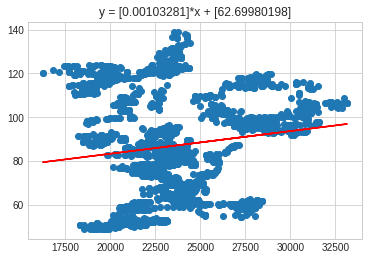

[0.00103281]
[62.69980198]
----------------------------------------------------------done-------------------------------------------------------------
IXIC


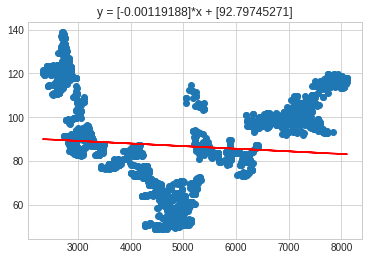

[-0.00119188]
[92.79745271]
----------------------------------------------------------done-------------------------------------------------------------
KOSPI


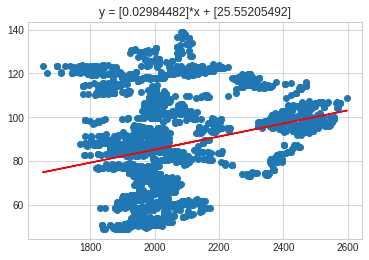

[0.02984482]
[25.55205492]
----------------------------------------------------------done-------------------------------------------------------------
Nikkei225


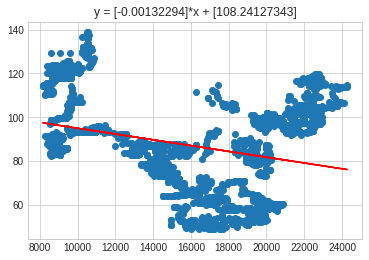

[-0.00132294]
[108.24127343]
----------------------------------------------------------done-------------------------------------------------------------
SX5E


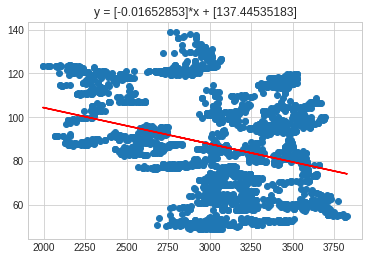

[-0.01652853]
[137.44535183]
----------------------------------------------------------done-------------------------------------------------------------
ASX


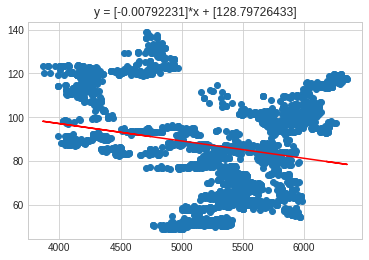

[-0.00792231]
[128.79726433]
----------------------------------------------------------done-------------------------------------------------------------
TSX


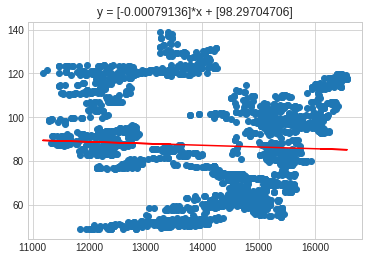

[-0.00079136]
[98.29704706]
----------------------------------------------------------done-------------------------------------------------------------


In [ ]:
for i in range(1,len(df.columns)):
    print(f'{df.iloc[:,i].name}')
    X = df.iloc[:,i].values.reshape(-1,1)
    Y = df.iloc[:,0].values.reshape(-1,1)
    lr.fit(X, Y)
    plt.scatter(X, Y)
    Y2 = lr.predict(X)
    plt.plot(X, Y2, color='red')
    plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
    plt.show()
    print(lr.coef_[0])
    print(lr.intercept_)
    print('----------------------------------------------------------done-------------------------------------------------------------')

#그래프

In [ ]:
df = df.reset_index()

In [ ]:
path = '/content/gdrive/MyDrive/coal_practice'

In [ ]:
from urllib.request import urlopen
import json

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

In [ ]:
import plotly.express as px
import numpy as np
## set the seed to a random number obtained from /dev/urandom
## or its Windows analog, 
## or if neither of those is available, it will use the clock.

# trendline = 'ols' allow us to draw a trendline

# fig = px.line(df, x='ds', y='Coal')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['ds'], y=df["Coal"], mode='lines')) 
fig.add_trace(go.Scatter(x=df['ds'], y=df['iron'], mode='lines')) 
fig.show()
fig.show(renderer="colab") 

In [ ]:
fig = px.scatter(df, x = 'iron' , y = 'Coal', trendline = 'ols')
# # fig.write_image(path + "figscat.png")
fig.show(renderer='colab')


In [ ]:
df=df.set_index('ds')


In [ ]:
df2=df.iloc[:,[0,11,12,13,14,15,16,17,18]]

In [ ]:
df1=df[[df.iloc[:,0].name,df.iloc[:,1].name,df.iloc[:,2].name,df.iloc[:,3].name,df.iloc[:,4].name,df.iloc[:,5].name,df.iloc[:,6].name,df.iloc[:,7].name]]

In [ ]:
fig = px.scatter_matrix(df1)
fig.show(renderer='colab')

In [ ]:
fig = px.scatter_matrix(df2)
fig.show(renderer='colab')

In [ ]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 460 kB/s 
     |████████████████████████████████| 357 kB 32.7 MB/s 


In [ ]:
pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 
import plotly.express as px
from dash.dependencies import Input, Output

In [ ]:
! pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = df.reset_index()

In [ ]:
# %%writefile my_app.py
from dash import Dash, dcc, html, Input, Output
import plotly.express as px



app = JupyterDash(__name__)


app.layout = html.Div([
    html.H4('Blackcoal price analysis'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select:"),
    dcc.Dropdown(
        id="ticker",
        options=["Coal","iron", "WTI", "DXY"],
        value="Coal",
        clearable=False,
    ),
])


@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"))
def display_time_series(ticker):
    
    fig = px.line(df, x='ds', y=ticker)
    return fig


if __name__ == "__main__":
     app.run_server(mode="inline")


<IPython.core.display.Javascript object>

In [ ]:
!python my_app.py

  File "my_app.py", line 30
    !gunicorn web:app -b 0.0.0.0:8000 -w 2 --timeout=10 -k gevent
    ^
SyntaxError: invalid syntax


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
